In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

data = []
runs = [
    "sincosproj_s5r3_2025-04-09_06-13-40/eval_ckpt500.csv",
    "sincosproj_s6r5_2025-04-09_07-21-21/eval_ckpt500.csv",
    "sincosproj_s5r3_2025-04-11_12-56-38/eval_ckpt500.csv",
]
for run in runs:
    data.append((run, pd.read_csv(run)))

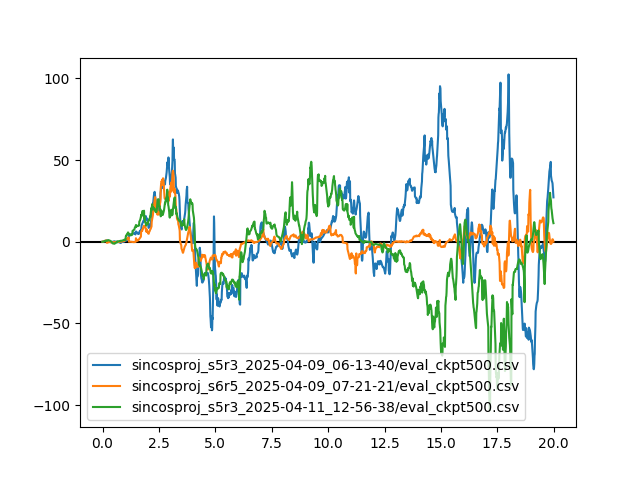

In [63]:
plt.figure()
plt.axhline(0, color='k')
for run, df in data:
    cmd = np.array([df['obs13'], df['obs14']]).T
    linvel = np.array([df['vel0'], df['vel1']]).T
    df['alignedvel'] = np.einsum('ij,ij->i', cmd, linvel)
    df['alignedvel']
    plt.plot(df['i']*0.01, df['alignedvel'], label=run)
plt.legend()

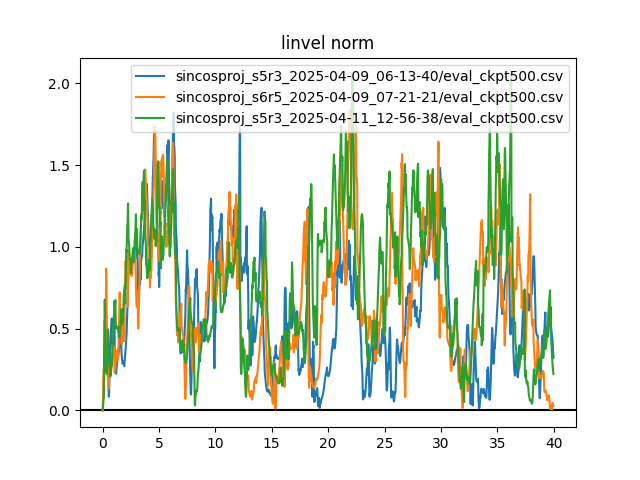

In [60]:
plt.figure()
plt.axhline(0, color='k')
plt.title("linvel norm")
for run, df in data:
    cmd = np.array([df['obs13'], df['obs14']]).T
    linvel = np.array([df['vel0'], df['vel1']]).T
    velnorm = np.linalg.norm(linvel, axis=1)
# plt.plot(df['i']*2/100., np.abs(linvel[:,0]), label='vx')
# plt.plot(df['i']*2/100., np.abs(linvel[:,1]), label='vy')
    plt.plot(df['i']*2/100., velnorm, label=run)
plt.legend()

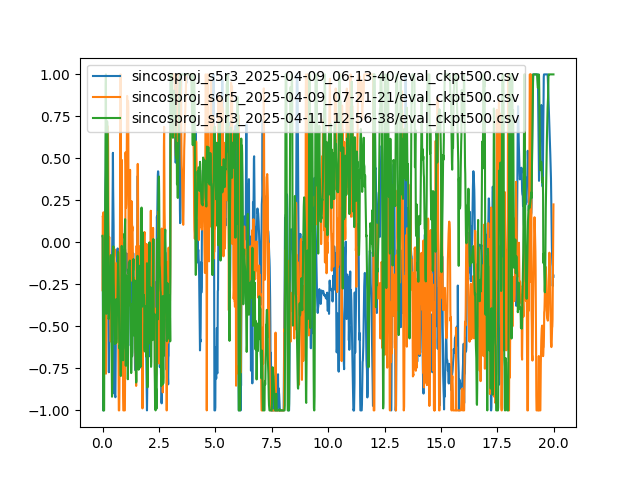

In [61]:
plt.figure()
for run,df in data:
    plt.plot(df['i']*0.01, np.clip(df['action'], a_min=-1, a_max=1), label=run)
plt.legend()

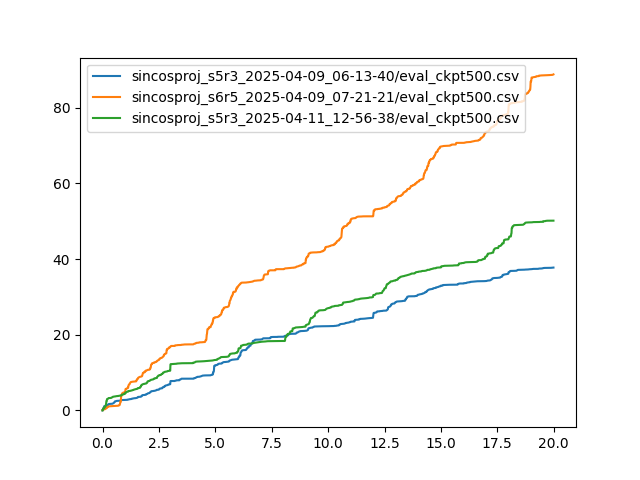

In [68]:
plt.figure()
for run,df in data:
    action_clip = np.clip(df['action'], a_min=-1, a_max=1)
    energy_daction = np.cumsum(np.diff(action_clip, prepend=0)**2)
    plt.plot(df['i']*0.01, energy_daction, label=run)
plt.legend()

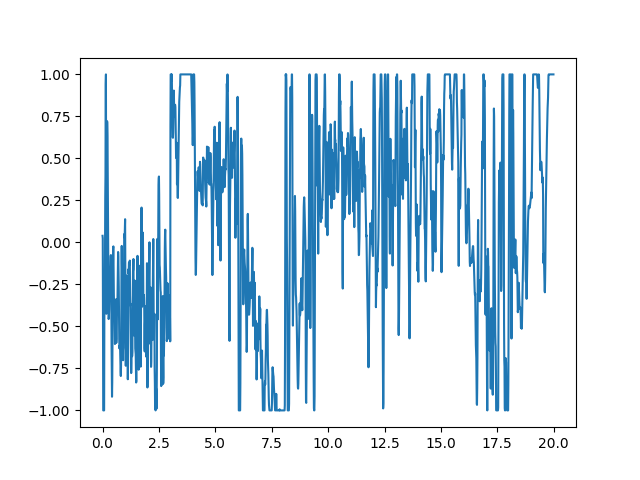

In [62]:
plt.figure()
plt.plot(df['i']*0.01, np.clip(df['action_filt'], a_min=-1, a_max=1))